# GEOGRAPHICAL PARTITION

In [1]:
stop = "5"

### IMPORT LIBRARIES

In [2]:
# folium allows to visualize geolocalized data with the jupyter notebook
import folium
from folium.plugins import MarkerCluster
# pandas is needed to read the csv file and to perform some basic operations on dataframes
import pandas as pd
# matplotlib is used to draw graphs
import matplotlib.pyplot as plt
# module for different stats
from statistics import mean 

**Read the dataset containing the areas**

In [3]:
df = pd.read_csv('../../../datasets/in/Traj'+stop+'min/vehicle_areas.csv') 
print ("The dataset contains", len(df), "vehicles.")

The dataset contains 6558 vehicles.


In [4]:
df.head(5)

vehicle vehicletype  bottom_left_y  bottom_left_x  top_right_y  \
0   9730_94460         Van      40.103766      22.153462    40.973120   
1   1390_62330         Van      40.000906      22.777662    40.810602   
2   2580_89690         Van      37.935882      23.534898    38.160045   
3   8050_77770         Van      37.647430      20.884870    40.788176   
4  10010_94540         Van      37.676792      23.537746    38.194125   

   top_right_x  area  
0    23.972141     1  
1    23.570981     1  
2    24.012240     2  
3    23.850930     3  
4    24.075786     2

In [5]:
print("The number of different areas are", len(df['area'].unique()))

The number of different areas are 229


In [6]:
print("The 15 most frequent areas are the following.")
df['area'].value_counts()[:15]

The 15 most frequent areas are the following.


3     1180
2      883
6      741
4      534
11     373
8      355
1      307
16     256
7      241
14     172
32     122
12      88
10      86
19      66
5       66
Name: area, dtype: int64

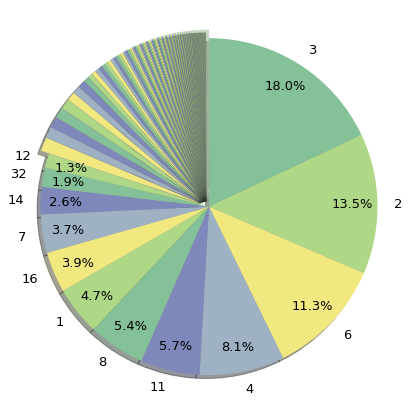

In [7]:
fig = plt.figure(figsize=(7, 7)) 
fig_dims = (1, 1)

labels =  [" "] * len(df['area'].value_counts())
labels[:12] = df['area'].value_counts()[:12].index.tolist()

explode = [0.05] * len(df['area'].value_counts())
explode[0:12] = [0] * 12

def define_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        if pct > 1.33:
            return '{p:.1f}%'.format(p=pct)
        else:
            return ' '
    return my_autopct

c=['#85c198', '#aed886', '#f2e880', '#9fb2c3', '#7e88ba']

ax = plt.subplot2grid(fig_dims, (0, 0))
inside, texts, ltexts = ax.pie(df['area'].value_counts(), explode=explode, autopct=define_autopct(df['area'].value_counts()), pctdistance=0.85, labels=labels, shadow=True, startangle=90, counterclock=False, colors=c)
for i in range(len(texts)):
    texts[i].set_fontsize(13)
    ltexts[i].set_fontsize(13)
ax.axis('equal')

plt.savefig('../../../thesis/images/Areas_pie.png', format='png', bbox_inches='tight')

In [8]:
def center_point(list_point):
    # compute the mean point out of a list
    sum_p = 0
    for i in list_point:
        sum_p += i
    c = sum_p / len(list_point)
    return c

In [9]:
def compute_list_points(df):
    # takes from the dataset the 4 list of coordinates
    list_bottom_y = list(df["bottom_left_y"])
    list_bottom_x = list(df["bottom_left_x"])
    list_top_y = list(df["top_right_y"])
    list_top_x = list(df["top_right_x"])
    return list_bottom_y, list_bottom_x, list_top_y, list_top_x

In [10]:
def compute_center_map(list_bottom_y, list_bottom_x, list_top_y, list_top_x):
    # compute the approximate center of all the rectangles
    c_by = mean(list_bottom_y)
    c_bx = mean(list_bottom_x)
    c_ty = mean(list_top_y)
    c_tx = mean(list_top_x)
    
    c_y = (c_by + c_ty) / 2 
    c_x = (c_bx + c_tx) / 2 
    return c_y, c_x

### AREA 3 (WHOLE GREECE)

In [53]:
id_area = 3
df_p = df[df["area"] == id_area]
print("The number of vehicles in that area is", len(df_p))
list_bottom_y, list_bottom_x, list_top_y, list_top_x = compute_list_points(df_p)
#c_y, c_x = compute_center_map(list_bottom_y, list_bottom_x, list_top_y, list_top_x)

colors = ['gray', 'orange', 'green', 'lightred', 'darkgreen', 'darkblue', 'darkred', 'pink', 
          'lightgrayblack', 'lightblue', 'cadetblue', 'darkpurple', 'lightgreen', 'purple', 'blue', 'red', 'beige']

m = folium.Map(location=[39.2,24.3], zoom_start=6)
for i in range(len(df_p)):
    r = folium.Rectangle([[list_bottom_y[i], list_bottom_x[i]], [list_top_y[i], list_top_x[i]]], color=colors[i%17], fill_opacity=0.1, fill=True, weight=0.5)
    m.add_child(r)
    
folium.map.Marker([43.5, 32], 
    icon=folium.features.DivIcon(icon_size=(300,36), icon_anchor=(0,0),
                                 html='<div style="font-size: 48pt">AREA '+str(id_area)
                                 +'</div>')).add_to(m)
m

The number of vehicles in that area is 1180


(-1.1061193672222687,
 1.1167266523473043,
 -1.1032271074032844,
 1.110658672397618)

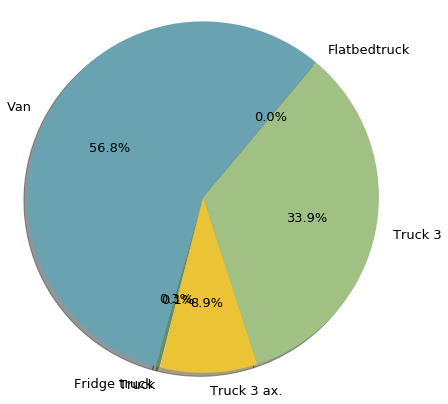

In [54]:
n_van = len(df_p[df_p["vehicletype"] == "Van"])
n_fridge = len(df_p[df_p["vehicletype"] == "Fridge truck"])
n_truck = len(df_p[df_p["vehicletype"] == "Truck"])
n_truck3ax = len(df_p[df_p["vehicletype"] == "Truck 3 ax."])
n_truck3 = len(df_p[df_p["vehicletype"] == "Truck 3"])
n_flat = len(df_p[df_p["vehicletype"] == "Flatbedtruck"])

sizes = [n_van, n_fridge, n_truck, n_truck3ax, n_truck3, n_flat]

fig = plt.figure(figsize=(7, 7)) 

ax = plt.subplot2grid(fig_dims, (0, 0))
labels = 'Van', 'Fridge truck', 'Truck', 'Truck 3 ax.', 'Truck 3', 'Flatbedtruck'
#explode = (0.01, 0.05, 0.1, 0.2, )
c = ["#69A2B0", "#659157", "#FFCAB1", "#EAC435", "#A1C084", "#E05263", "#5D2E46"]
inside, texts, ltexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=50, colors=c)
for i in range(len(texts)):
    texts[i].set_fontsize(13)
    ltexts[i].set_fontsize(13)
ax.axis('equal') 

### AREA 2 (ATHENS AND SURROUNDINGS)

In [55]:
id_area = 2
df_p = df[df["area"] == id_area]
print("The number of vehicles in that area is", len(df_p))
list_bottom_y, list_bottom_x, list_top_y, list_top_x = compute_list_points(df_p)
#c_y, c_x = compute_center_map(list_bottom_y, list_bottom_x, list_top_y, list_top_x)

colors = ['gray', 'orange', 'green', 'lightred', 'darkgreen', 'darkblue', 'darkred', 'pink', 
          'lightgrayblack', 'lightblue', 'cadetblue', 'darkpurple', 'lightgreen', 'purple', 'blue', 'red', 'beige']

m = folium.Map(location=[39.2,24.3], zoom_start=6)
for i in range(len(df_p)):
    r = folium.Rectangle([[list_bottom_y[i], list_bottom_x[i]], [list_top_y[i], list_top_x[i]]], color=colors[i%17], fill_opacity=0.1, fill=True, weight=0.5)
    m.add_child(r)
    
folium.map.Marker([43.5, 32], 
    icon=folium.features.DivIcon(icon_size=(300,36), icon_anchor=(0,0),
                                 html='<div style="font-size: 48pt">AREA '+str(id_area)
                                 +'</div>')).add_to(m)
m

The number of vehicles in that area is 883


(-1.1107554981618994,
 1.1194112743250937,
 -1.1005984417551185,
 1.1101446028485853)

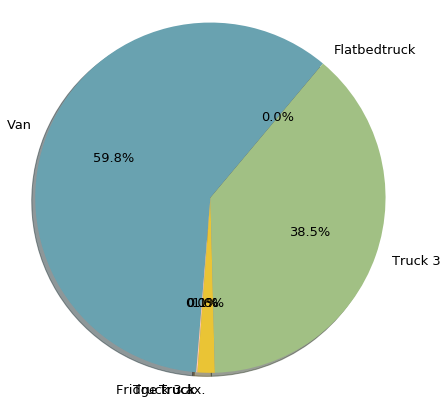

In [56]:
n_van = len(df_p[df_p["vehicletype"] == "Van"])
n_fridge = len(df_p[df_p["vehicletype"] == "Fridge truck"])
n_truck = len(df_p[df_p["vehicletype"] == "Truck"])
n_truck3ax = len(df_p[df_p["vehicletype"] == "Truck 3 ax."])
n_truck3 = len(df_p[df_p["vehicletype"] == "Truck 3"])
n_flat = len(df_p[df_p["vehicletype"] == "Flatbedtruck"])

sizes = [n_van, n_fridge, n_truck, n_truck3ax, n_truck3, n_flat]

fig = plt.figure(figsize=(7, 7)) 

ax = plt.subplot2grid(fig_dims, (0, 0))
labels = 'Van', 'Fridge truck', 'Truck', 'Truck 3 ax.', 'Truck 3', 'Flatbedtruck'
#explode = (0.01, 0.05, 0.1, 0.2, )
c = ["#69A2B0", "#659157", "#FFCAB1", "#EAC435", "#A1C084", "#E05263", "#5D2E46"]
inside, texts, ltexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=50, colors=c)
for i in range(len(texts)):
    texts[i].set_fontsize(13)
    ltexts[i].set_fontsize(13)
ax.axis('equal') 

### AREA 6 (WHOLE ALBANY)

In [13]:
id_area = 6
df_p = df[df["area"] == id_area]
print("The number of vehicles in that area is", len(df_p))
list_bottom_y, list_bottom_x, list_top_y, list_top_x = compute_list_points(df_p)
#c_y, c_x = compute_center_map(list_bottom_y, list_bottom_x, list_top_y, list_top_x)

colors = ['gray', 'orange', 'green', 'lightred', 'darkgreen', 'darkblue', 'darkred', 'pink', 
          'lightgrayblack', 'lightblue', 'cadetblue', 'darkpurple', 'lightgreen', 'purple', 'blue', 'red', 'beige']

m = folium.Map(location=[39.2,24.3], zoom_start=6)
for i in range(len(df_p)):
    r = folium.Rectangle([[list_bottom_y[i], list_bottom_x[i]], [list_top_y[i], list_top_x[i]]], color=colors[i%17], fill_opacity=0.1, fill=True, weight=0.5)
    m.add_child(r)
    
folium.map.Marker([43.5, 32], 
    icon=folium.features.DivIcon(icon_size=(300,36), icon_anchor=(0,0),
                                 html='<div style="font-size: 48pt">AREA '+str(id_area)
                                 +'</div>')).add_to(m)
m

The number of vehicles in that area is 741


### AREA 4 (ATHENS AND PELOPONNESE)

In [14]:
id_area = 4
df_p = df[df["area"] == id_area]
print("The number of vehicles in that area is", len(df_p))
list_bottom_y, list_bottom_x, list_top_y, list_top_x = compute_list_points(df_p)
#c_y, c_x = compute_center_map(list_bottom_y, list_bottom_x, list_top_y, list_top_x)

colors = ['gray', 'orange', 'green', 'lightred', 'darkgreen', 'darkblue', 'darkred', 'pink', 
          'lightgrayblack', 'lightblue', 'cadetblue', 'darkpurple', 'lightgreen', 'purple', 'blue', 'red', 'beige']

m = folium.Map(location=[39.2,24.3], zoom_start=6)
for i in range(len(df_p)):
    r = folium.Rectangle([[list_bottom_y[i], list_bottom_x[i]], [list_top_y[i], list_top_x[i]]], color=colors[i%17], fill_opacity=0.1, fill=True, weight=0.5)
    m.add_child(r)
    
folium.map.Marker([43.5, 32], 
    icon=folium.features.DivIcon(icon_size=(300,36), icon_anchor=(0,0),
                                 html='<div style="font-size: 48pt">AREA '+str(id_area)
                                 +'</div>')).add_to(m)
m

The number of vehicles in that area is 534


### AREA 11 (ATHENS SMALL)

In [40]:
id_area = 11
df_p = df[df["area"] == id_area]
print("The number of vehicles in that area is", len(df_p))
list_bottom_y, list_bottom_x, list_top_y, list_top_x = compute_list_points(df_p)
#c_y, c_x = compute_center_map(list_bottom_y, list_bottom_x, list_top_y, list_top_x)

colors = ['gray', 'orange', 'green', 'lightred', 'darkgreen', 'darkblue', 'darkred', 'pink', 
          'lightgrayblack', 'lightblue', 'cadetblue', 'darkpurple', 'lightgreen', 'purple', 'blue', 'red', 'beige']

m = folium.Map(location=[39.2,24.3], zoom_start=6)
for i in range(len(df_p)):
    r = folium.Rectangle([[list_bottom_y[i], list_bottom_x[i]], [list_top_y[i], list_top_x[i]]], color=colors[i%17], fill_opacity=0.1, fill=True, weight=0.5)
    m.add_child(r)
    
folium.map.Marker([43.5, 32], 
    icon=folium.features.DivIcon(icon_size=(300,36), icon_anchor=(0,0),
                                 html='<div style="font-size: 48pt">AREA '+str(id_area)
                                 +'</div>')).add_to(m)
m

The number of vehicles in that area is 373


(-1.1107554981618994,
 1.1194112743250937,
 -1.1005984417551185,
 1.1101446028485853)

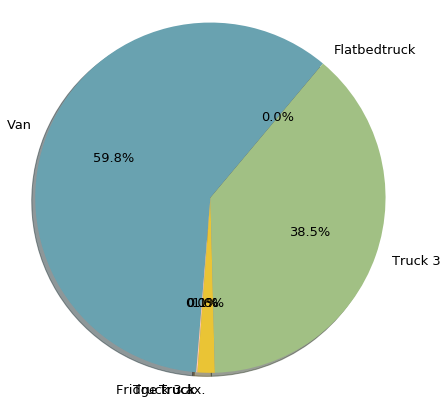

In [52]:
n_van = len(df_p[df_p["vehicletype"] == "Van"])
n_fridge = len(df_p[df_p["vehicletype"] == "Fridge truck"])
n_truck = len(df_p[df_p["vehicletype"] == "Truck"])
n_truck3ax = len(df_p[df_p["vehicletype"] == "Truck 3 ax."])
n_truck3 = len(df_p[df_p["vehicletype"] == "Truck 3"])
n_flat = len(df_p[df_p["vehicletype"] == "Flatbedtruck"])

sizes = [n_van, n_fridge, n_truck, n_truck3ax, n_truck3, n_flat]

fig = plt.figure(figsize=(7, 7)) 

ax = plt.subplot2grid(fig_dims, (0, 0))
labels = 'Van', 'Fridge truck', 'Truck', 'Truck 3 ax.', 'Truck 3', 'Flatbedtruck'
#explode = (0.01, 0.05, 0.1, 0.2, )
c = ["#69A2B0", "#659157", "#FFCAB1", "#EAC435", "#A1C084", "#E05263", "#5D2E46"]
inside, texts, ltexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=50, colors=c)
for i in range(len(texts)):
    texts[i].set_fontsize(13)
    ltexts[i].set_fontsize(13)
ax.axis('equal') 

### AREA 8 (GREECE AND BALKANS)

In [16]:
id_area = 8
df_p = df[df["area"] == id_area]
print("The number of vehicles in that area is", len(df_p))
list_bottom_y, list_bottom_x, list_top_y, list_top_x = compute_list_points(df_p)
#c_y, c_x = compute_center_map(list_bottom_y, list_bottom_x, list_top_y, list_top_x)

colors = ['gray', 'orange', 'green', 'lightred', 'darkgreen', 'darkblue', 'darkred', 'pink', 
          'lightgrayblack', 'lightblue', 'cadetblue', 'darkpurple', 'lightgreen', 'purple', 'blue', 'red', 'beige']

m = folium.Map(location=[50.5,17], zoom_start=4)
for i in range(len(df_p)):
    r = folium.Rectangle([[list_bottom_y[i], list_bottom_x[i]], [list_top_y[i], list_top_x[i]]], color=colors[i%17], fill_opacity=0.1, fill=True, weight=0.5)
    m.add_child(r)
    
folium.map.Marker([63, 48], 
    icon=folium.features.DivIcon(icon_size=(300,36), icon_anchor=(0,0),
                                 html='<div style="font-size: 48pt">AREA '+str(id_area)
                                 +'</div>')).add_to(m)
m

The number of vehicles in that area is 355


### AREA 1 (NORTH GREECE)

In [17]:
id_area = 1
df_p = df[df["area"] == id_area]
print("The number of vehicles in that area is", len(df_p))
list_bottom_y, list_bottom_x, list_top_y, list_top_x = compute_list_points(df_p)
#c_y, c_x = compute_center_map(list_bottom_y, list_bottom_x, list_top_y, list_top_x)

colors = ['gray', 'orange', 'green', 'lightred', 'darkgreen', 'darkblue', 'darkred', 'pink', 
          'lightgrayblack', 'lightblue', 'cadetblue', 'darkpurple', 'lightgreen', 'purple', 'blue', 'red', 'beige']

m = folium.Map(location=[39.2,24.3], zoom_start=6)
for i in range(len(df_p)):
    r = folium.Rectangle([[list_bottom_y[i], list_bottom_x[i]], [list_top_y[i], list_top_x[i]]], color=colors[i%17], fill_opacity=0.1, fill=True, weight=0.5)
    m.add_child(r)
    
folium.map.Marker([43.5, 32], 
    icon=folium.features.DivIcon(icon_size=(300,36), icon_anchor=(0,0),
                                 html='<div style="font-size: 48pt">AREA '+str(id_area)
                                 +'</div>')).add_to(m)
m

The number of vehicles in that area is 307


### AREA 16 (WEST COAST ALBANY)

In [18]:
id_area = 16
df_p = df[df["area"] == id_area]
print("The number of vehicles in that area is", len(df_p))
list_bottom_y, list_bottom_x, list_top_y, list_top_x = compute_list_points(df_p)
#c_y, c_x = compute_center_map(list_bottom_y, list_bottom_x, list_top_y, list_top_x)

colors = ['gray', 'orange', 'green', 'lightred', 'darkgreen', 'darkblue', 'darkred', 'pink', 
          'lightgrayblack', 'lightblue', 'cadetblue', 'darkpurple', 'lightgreen', 'purple', 'blue', 'red', 'beige']

m = folium.Map(location=[39.2,24.3], zoom_start=6)
for i in range(len(df_p)):
    r = folium.Rectangle([[list_bottom_y[i], list_bottom_x[i]], [list_top_y[i], list_top_x[i]]], color=colors[i%17], fill_opacity=0.1, fill=True, weight=0.5)
    m.add_child(r)
    
folium.map.Marker([43.5, 32], 
    icon=folium.features.DivIcon(icon_size=(300,36), icon_anchor=(0,0),
                                 html='<div style="font-size: 48pt">AREA '+str(id_area)
                                 +'</div>')).add_to(m)
m

The number of vehicles in that area is 256


 ### AREA 7 (WHOLE EUROPE)

In [57]:
id_area = 7
df_p = df[df["area"] == id_area]
print("The number of vehicles in that area is", len(df_p))
list_bottom_y, list_bottom_x, list_top_y, list_top_x = compute_list_points(df_p)
#c_y, c_x = compute_center_map(list_bottom_y, list_bottom_x, list_top_y, list_top_x)

colors = ['gray', 'orange', 'green', 'lightred', 'darkgreen', 'darkblue', 'darkred', 'pink', 
          'lightgrayblack', 'lightblue', 'cadetblue', 'darkpurple', 'lightgreen', 'purple', 'blue', 'red', 'beige']

m = folium.Map(location=[50.5,17], zoom_start=4)
for i in range(len(df_p)):
    r = folium.Rectangle([[list_bottom_y[i], list_bottom_x[i]], [list_top_y[i], list_top_x[i]]], color=colors[i%17], fill_opacity=0.1, fill=True, weight=0.5)
    m.add_child(r)
    
folium.map.Marker([63, 48], 
    icon=folium.features.DivIcon(icon_size=(300,36), icon_anchor=(0,0),
                                 html='<div style="font-size: 48pt">AREA '+str(id_area)
                                 +'</div>')).add_to(m)
m

The number of vehicles in that area is 241


(-1.1092045959013055,
 1.1022154314872763,
 -1.1116053045040466,
 1.1172848578339616)

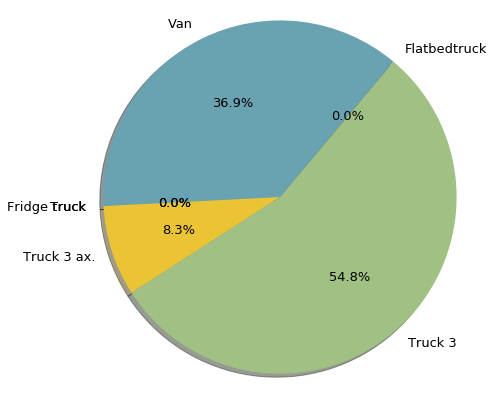

In [58]:
n_van = len(df_p[df_p["vehicletype"] == "Van"])
n_fridge = len(df_p[df_p["vehicletype"] == "Fridge truck"])
n_truck = len(df_p[df_p["vehicletype"] == "Truck"])
n_truck3ax = len(df_p[df_p["vehicletype"] == "Truck 3 ax."])
n_truck3 = len(df_p[df_p["vehicletype"] == "Truck 3"])
n_flat = len(df_p[df_p["vehicletype"] == "Flatbedtruck"])

sizes = [n_van, n_fridge, n_truck, n_truck3ax, n_truck3, n_flat]

fig = plt.figure(figsize=(7, 7)) 

ax = plt.subplot2grid(fig_dims, (0, 0))
labels = 'Van', 'Fridge truck', 'Truck', 'Truck 3 ax.', 'Truck 3', 'Flatbedtruck'
#explode = (0.01, 0.05, 0.1, 0.2, )
c = ["#69A2B0", "#659157", "#FFCAB1", "#EAC435", "#A1C084", "#E05263", "#5D2E46"]
inside, texts, ltexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=50, colors=c)
for i in range(len(texts)):
    texts[i].set_fontsize(13)
    ltexts[i].set_fontsize(13)
ax.axis('equal') 

### AREA 14 (CRETE)

In [20]:
id_area = 14
df_p = df[df["area"] == id_area]
print("The number of vehicles in that area is", len(df_p))
list_bottom_y, list_bottom_x, list_top_y, list_top_x = compute_list_points(df_p)
#c_y, c_x = compute_center_map(list_bottom_y, list_bottom_x, list_top_y, list_top_x)

colors = ['gray', 'orange', 'green', 'lightred', 'darkgreen', 'darkblue', 'darkred', 'pink', 
          'lightgrayblack', 'lightblue', 'cadetblue', 'darkpurple', 'lightgreen', 'purple', 'blue', 'red', 'beige']

m = folium.Map(location=[39.2,24.3], zoom_start=6)
for i in range(len(df_p)):
    r = folium.Rectangle([[list_bottom_y[i], list_bottom_x[i]], [list_top_y[i], list_top_x[i]]], color=colors[i%17], fill_opacity=0.1, fill=True, weight=0.5)
    m.add_child(r)
    
folium.map.Marker([43.5, 32], 
    icon=folium.features.DivIcon(icon_size=(300,36), icon_anchor=(0,0),
                                 html='<div style="font-size: 48pt">AREA '+str(id_area)
                                 +'</div>')).add_to(m)
m

The number of vehicles in that area is 172


### AREA 32 (TIRANE AND DURRES IN ALBANY)

In [21]:
id_area = 32
df_p = df[df["area"] == id_area]
print("The number of vehicles in that area is", len(df_p))
list_bottom_y, list_bottom_x, list_top_y, list_top_x = compute_list_points(df_p)
#c_y, c_x = compute_center_map(list_bottom_y, list_bottom_x, list_top_y, list_top_x)

colors = ['gray', 'orange', 'green', 'lightred', 'darkgreen', 'darkblue', 'darkred', 'pink', 
          'lightgrayblack', 'lightblue', 'cadetblue', 'darkpurple', 'lightgreen', 'purple', 'blue', 'red', 'beige']

m = folium.Map(location=[39.2,24.3], zoom_start=6)
for i in range(len(df_p)):
    r = folium.Rectangle([[list_bottom_y[i], list_bottom_x[i]], [list_top_y[i], list_top_x[i]]], color=colors[i%17], fill_opacity=0.1, fill=True, weight=0.5)
    m.add_child(r)
    
folium.map.Marker([43.5, 32], 
    icon=folium.features.DivIcon(icon_size=(300,36), icon_anchor=(0,0),
                                 html='<div style="font-size: 48pt">AREA '+str(id_area)
                                 +'</div>')).add_to(m)
m

The number of vehicles in that area is 122


### AREA 12 (IOANNINA AND WEST GREECE)

In [22]:
id_area = 12
df_p = df[df["area"] == id_area]
print("The number of vehicles in that area is", len(df_p))
list_bottom_y, list_bottom_x, list_top_y, list_top_x = compute_list_points(df_p)
#c_y, c_x = compute_center_map(list_bottom_y, list_bottom_x, list_top_y, list_top_x)

colors = ['gray', 'orange', 'green', 'lightred', 'darkgreen', 'darkblue', 'darkred', 'pink', 
          'lightgrayblack', 'lightblue', 'cadetblue', 'darkpurple', 'lightgreen', 'purple', 'blue', 'red', 'beige']

m = folium.Map(location=[39.2,24.3], zoom_start=6)
for i in range(len(df_p)):
    r = folium.Rectangle([[list_bottom_y[i], list_bottom_x[i]], [list_top_y[i], list_top_x[i]]], color=colors[i%17], fill_opacity=0.1, fill=True, weight=0.5)
    m.add_child(r)
    
folium.map.Marker([43.5, 32], 
    icon=folium.features.DivIcon(icon_size=(300,36), icon_anchor=(0,0),
                                 html='<div style="font-size: 48pt">AREA '+str(id_area)
                                 +'</div>')).add_to(m)
m

The number of vehicles in that area is 88


### AREA 10 (THESSALONIKI AND SURROUNDINGS)

In [23]:
id_area = 10
df_p = df[df["area"] == id_area]
print("The number of vehicles in that area is", len(df_p))
list_bottom_y, list_bottom_x, list_top_y, list_top_x = compute_list_points(df_p)
#c_y, c_x = compute_center_map(list_bottom_y, list_bottom_x, list_top_y, list_top_x)

colors = ['gray', 'orange', 'green', 'lightred', 'darkgreen', 'darkblue', 'darkred', 'pink', 
          'lightgrayblack', 'lightblue', 'cadetblue', 'darkpurple', 'lightgreen', 'purple', 'blue', 'red', 'beige']

m = folium.Map(location=[39.2,24.3], zoom_start=6)
for i in range(len(df_p)):
    r = folium.Rectangle([[list_bottom_y[i], list_bottom_x[i]], [list_top_y[i], list_top_x[i]]], color=colors[i%17], fill_opacity=0.1, fill=True, weight=0.5)
    m.add_child(r)
    
folium.map.Marker([43.5, 32], 
    icon=folium.features.DivIcon(icon_size=(300,36), icon_anchor=(0,0),
                                 html='<div style="font-size: 48pt">AREA '+str(id_area)
                                 +'</div>')).add_to(m)
m

The number of vehicles in that area is 86


### AREA 19 (ATHENS VERY SMALL)

In [24]:
id_area = 19
df_p = df[df["area"] == id_area]
print("The number of vehicles in that area is", len(df_p))
list_bottom_y, list_bottom_x, list_top_y, list_top_x = compute_list_points(df_p)
#c_y, c_x = compute_center_map(list_bottom_y, list_bottom_x, list_top_y, list_top_x)

colors = ['gray', 'orange', 'green', 'lightred', 'darkgreen', 'darkblue', 'darkred', 'pink', 
          'lightgrayblack', 'lightblue', 'cadetblue', 'darkpurple', 'lightgreen', 'purple', 'blue', 'red', 'beige']

m = folium.Map(location=[39.2,24.3], zoom_start=6)
for i in range(len(df_p)):
    r = folium.Rectangle([[list_bottom_y[i], list_bottom_x[i]], [list_top_y[i], list_top_x[i]]], color=colors[i%17], fill_opacity=0.1, fill=True, weight=0.5)
    m.add_child(r)
    
folium.map.Marker([43.5, 32], 
    icon=folium.features.DivIcon(icon_size=(300,36), icon_anchor=(0,0),
                                 html='<div style="font-size: 48pt">AREA '+str(id_area)
                                 +'</div>')).add_to(m)
m

The number of vehicles in that area is 66


### AREA 5 (NORTH GREECE LARGE)

In [25]:
id_area = 5
df_p = df[df["area"] == id_area]
print("The number of vehicles in that area is", len(df_p))
list_bottom_y, list_bottom_x, list_top_y, list_top_x = compute_list_points(df_p)
#c_y, c_x = compute_center_map(list_bottom_y, list_bottom_x, list_top_y, list_top_x)

colors = ['gray', 'orange', 'green', 'lightred', 'darkgreen', 'darkblue', 'darkred', 'pink', 
          'lightgrayblack', 'lightblue', 'cadetblue', 'darkpurple', 'lightgreen', 'purple', 'blue', 'red', 'beige']

m = folium.Map(location=[39.2,24.3], zoom_start=6)
for i in range(len(df_p)):
    r = folium.Rectangle([[list_bottom_y[i], list_bottom_x[i]], [list_top_y[i], list_top_x[i]]], color=colors[i%17], fill_opacity=0.1, fill=True, weight=0.5)
    m.add_child(r)
    
folium.map.Marker([43.5, 32], 
    icon=folium.features.DivIcon(icon_size=(300,36), icon_anchor=(0,0),
                                 html='<div style="font-size: 48pt">AREA '+str(id_area)
                                 +'</div>')).add_to(m)
m

The number of vehicles in that area is 66


## Last 100 vehicles excluded
**(they are all clustered alone)**

In [26]:
ix = df['area'].value_counts()[-100:].index.tolist()

df_p = df[df["area"].isin(ix)]
list_bottom_y, list_bottom_x, list_top_y, list_top_x = compute_list_points(df_p)
c_y, c_x = compute_center_map(list_bottom_y, list_bottom_x, list_top_y, list_top_x)

colors = ['gray', 'orange', 'green', 'lightred', 'darkgreen', 'darkblue', 'darkred', 'pink', 
          'lightgrayblack', 'lightblue', 'cadetblue', 'darkpurple', 'lightgreen', 'purple', 'blue', 'red', 'beige']

m = folium.Map(location=[c_y, c_x], zoom_start=6)
for i in range(len(df_p)):
    r = folium.Rectangle([[list_bottom_y[i], list_bottom_x[i]], [list_top_y[i], list_top_x[i]]], color=colors[i%17], fill_opacity=0.8, fill=True, weight=4)
    m.add_child(r)
m